In [5]:
import numpy as np
import networkx as nx

In [6]:
# generate adjacency graph
np.random.seed(69-2)
n = 3
A = (np.random.rand(n,n)>0.5).astype(int)
A

array([[1, 1, 1],
       [0, 0, 0],
       [0, 1, 1]])

[(0, 0), (0, 1), (0, 2), (2, 1), (2, 2)]


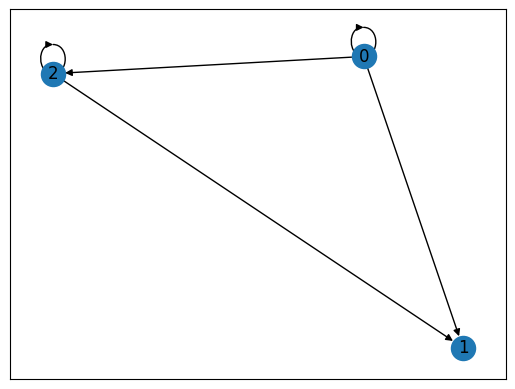

In [9]:
# draw graph
edges = [tuple(e) for e in np.argwhere(A)] #np arr works too
print(edges)
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw_networkx(G)

Degree matrix of a graph (by https://arxiv.org/pdf/1609.02907.pdf)

In [11]:
D = np.zeros_like(A)
for i in range(n):
    for j in range(n):
        D[i,i] += A[i,j]
D

array([[3, 0, 0],
       [0, 0, 0],
       [0, 0, 2]])